# 3459. Length of Longest V-Shaped Diagonal Segment

You are given a 2D integer matrix grid of size n x m, where each element is either 0, 1, or 2.

A V-shaped diagonal segment is defined as:
* The segment starts with 1.
* The subsequent elements follow this infinite sequence: 2, 0, 2, 0, ....
* The segment:
    * Starts along a diagonal direction (top-left to bottom-right, bottom-right to top-left, top-right to bottom-left, or bottom-left to top-right).
    * Continues the sequence in the same diagonal direction.
    * Makes at most one clockwise 90-degree turn to another diagonal direction while maintaining the sequence.

給定一個大小為 n x m 的二維整數矩陣網格，其中每個元素為 0、1 或 2。

V 形對角線段定義為：
* 該段從 1 開始。
* 後續元素遵循以下無限序列：2、0、2、0、…
* 該段：
* 沿對角線方向開始（從左上到右下、從右下到左上、從右上到左下或從左下到右上）。
* 沿著相同的對角線方向繼續序列。
* 在保持序列不變的情況下，最多順時針旋轉 90 度到另一對角線方向一次。


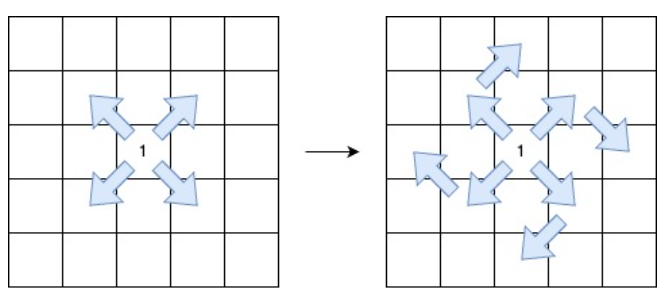

Return the length of the longest V-shaped diagonal segment. If no valid segment exists, return 0.

傳回最長 V 形對角線段的長度。如果不存在有效線段，則傳回 0。

In [ ]:
class Solution:
  def lenOfVDiagonal(self, grid: list[list[int]]) -> int:
    DIRS = ((-1, 1), (1, 1), (1, -1), (-1, -1))

    @functools.lru_cache(None)
    def dfs(i: int, j: int, turned: bool, num: int, dir: int) -> int:
      if i < 0 or i == len(grid) or j < 0 or j == len(grid[0]):
        return 0
      if grid[i][j] != num:
        return 0

      nextNum = 0 if num == 2 else 2
      dx, dy = DIRS[dir]
      res = 1 + dfs(i + dx, j + dy, turned, nextNum, dir)

      if not turned:
        nextDir = (dir + 1) % 4
        nextDx, nextDy = DIRS[nextDir]
        res = max(res, 1 + dfs(i + nextDx, j + nextDy, 1, nextNum, nextDir))

      return res

    return max((1 + dfs(i + dx, j + dy, 0, 2, d)
                for i, row in enumerate(grid)
                for j, num in enumerate(row)
                if num == 1
                for d, (dx, dy) in enumerate(DIRS)),
               default=0)